# Check sync process

In [1]:
from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()

Local configuration file found !!, no need to run the configuration (unless configuration has changed)


In [2]:
from u19_pipeline import ephys
#from u19_pipeline import ephys_pipeline as ephys
from u19_pipeline import recording

import pandas as pd

Connecting alvaros@datajoint00.pni.princeton.edu:3306


In [10]:
key = "subject_fullname like 'sbolkan%'"

#keys_session = pd.DataFrame((ephys.EphysPipelineSession * recording.Recording.BehaviorSession & key).fetch('KEY', as_dict=True, order_by='session_date DESC'))
keys_session = pd.DataFrame((ephys.EphysSession & key).fetch('KEY', as_dict=True, order_by='session_date DESC'))

#already_synced = pd.DataFrame((ephys.EphysPipelineSession * recording.Recording.BehaviorSession * ephys.BehaviorSync & key).fetch('KEY', as_dict=True, order_by='session_date DESC'))
already_synced = pd.DataFrame((ephys.EphysSession * ephys.BehaviorSync & key).fetch('KEY', as_dict=True, order_by='session_date DESC'))


keys_session_missing = keys_session.merge(already_synced, how='left', on=['subject_fullname', 'session_date', 'session_number'], indicator=True)
#keys_session_missing = keys_session.merge(already_synced, how='left', on=['recording_id'], indicator=True)


keys_session_missing = keys_session_missing.loc[keys_session_missing['_merge'] == 'left_only', :]
keys_session_missing = keys_session_missing.reset_index(drop=True)
keys_session_missing = keys_session_missing.drop(['_merge'], axis=1)
keys_session_missing = keys_session_missing.to_dict(orient='records')
keys_session_missing

[{'subject_fullname': 'sbolkan_a2a_487',
  'session_date': datetime.date(2022, 8, 11),
  'session_number': 0},
 {'subject_fullname': 'sbolkan_d1_228',
  'session_date': datetime.date(2022, 8, 10),
  'session_number': 0},
 {'subject_fullname': 'sbolkan_d1_231',
  'session_date': datetime.date(2022, 7, 20),
  'session_number': 0},
 {'subject_fullname': 'sbolkan_d1_231',
  'session_date': datetime.date(2022, 7, 19),
  'session_number': 0},
 {'subject_fullname': 'sbolkan_a2a_492',
  'session_date': datetime.date(2022, 7, 12),
  'session_number': 0},
 {'subject_fullname': 'sbolkan_d1_231',
  'session_date': datetime.date(2022, 6, 3),
  'session_number': 0},
 {'subject_fullname': 'sbolkan_d1_231',
  'session_date': datetime.date(2022, 5, 30),
  'session_number': 0},
 {'subject_fullname': 'sbolkan_a2a_492',
  'session_date': datetime.date(2022, 5, 26),
  'session_number': 0},
 {'subject_fullname': 'sbolkan_a2a_250',
  'session_date': datetime.date(2021, 12, 15),
  'session_number': 0}]

# Synchronize ePhys and Behavior

Populate the tables, using the nidaq file produced by spikeGLX. This is done automatically and produces a record of VR iteration numbers measured in the time of the ePhys setup.

In [9]:
for i in range(len(keys_session_missing)):
    print(keys_session_missing[i])
    try:
        ephys.BehaviorSync.populate(keys_session_missing[i])
    except Exception as e:
        print(e)

{'subject_fullname': 'sbolkan_a2a_487', 'session_date': datetime.date(2022, 9, 5), 'session_number': 0}
nChan: 9, nFileSamp: 107869152
in get_trial_signal_mode
iteration_pulse_signal_trial (472700,)
trial_iterations (1158, 1)
trial_iterations type <class 'numpy.ndarray'>
iter_samples 1158
behavior_time_vector_trial 1158
mode deduction:  pulse_signal
1
1158
1158
2
666
666
3
572
572
4
706
706
5
576
576
6
686
686
7
1277
1277
8
699
699
9
809
809
10
784
784
11
795
795
12
1132
1132
13
910
910
14
1063
1063
15
909
909
16
875
875
17
885
885
18
884
884
19
921
921
20
957
957
21
932
932
22
946
946
23
966
966
24
945
945
25
1088
1088
26
1058
1058
27
817
817
28
943
943
29
1673
1673
30
942
942
31
2055
2055
32
1374
1374
33
1027
1027
34
957
957
35
820
820
36
1141
1141
37
778
778
38
1132
1132
39
1022
1022
40
965
965
41
1955
1955
42
726
726
43
900
900
44
951
951
45
1008
1008
46
1606
1606
47
1085
1085
48
1011
1011
49
1047
1047
50
882
882
51
1061
1061
52
906
906
53
1103
1103
54
1115
1115
55
1035
1035
56
999

KeyboardInterrupt: 

In [4]:
print(keys_session_missing[0])
ephys.BehaviorSync.populate(keys_session_missing[0])

{'subject_fullname': 'sbolkan_d1_231', 'session_date': datetime.date(2022, 5, 30), 'session_number': 0}
nChan: 9, nFileSamp: 11733760
metrics to evaluate...
215 [] [] 215
Missed by a lot of trials, everything different or missing


ValueError: Ephys sync failed

In [3]:
key = dict()
key['session_date'] = '2022-08-18'
key['subject_fullname'] = 'sbolkan_a2a_487' 

ephys.BehaviorSync.populate(key)

nChan: 9, nFileSamp: 134469184
in get_trial_signal_mode
iteration_pulse_signal_trial (525958,)
trial_iterations (1490, 1)
trial_iterations type <class 'numpy.ndarray'>
iter_samples 1490
behavior_time_vector_trial 1490
mode deduction:  pulse_signal
total trials 321 321
1 1490 1490
2 2495 2495
3 704 704
4 1287 1287
5 776 776
6 593 593
7 801 801
8 619 619
9 1983 1983
10 1321 1321
11 2176 2176
12 818 818
13 697 697
14 1548 1548
15 755 755
16 767 767
17 636 636
18 1029 1029
19 1354 1354
20 690 690
21 703 703
22 684 684
23 783 783
24 840 840
25 1120 1120
26 619 619
27 857 857
28 641 641
29 720 720
30 776 776
31 1091 1091
32 666 666
33 1977 1977
34 783 783
35 894 894
36 741 741
37 638 638
38 912 912
39 852 852
40 716 716
41 995 995
42 690 690
43 1240 1240
44 1068 1068
45 2481 2481
46 739 739
47 843 843
48 725 725
49 711 711
50 780 780
51 1167 1167
52 751 751
53 864 864
54 923 923
55 646 646
56 631 631
57 861 861
58 971 971
59 1965 1965
60 657 657
61 938 938
62 1377 1377
63 750 750
64 1847 184

In [5]:
ephys.EphysSession()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,ephys_directory Path were session file will be stored in bucket
hnieh_E105,2021-01-15,0,/Volumes/Tank/schottdorf/NPX/2021_01_15_E105/towersTask_g0
jjulian_jj042,2021-10-31,0,/RigData/training/npx/electrophysiology/josh/jjulian_jj042/20211031/jjulian_jj042_20211031_g0
jjulian_jj042,2021-11-01,0,/RigData/training/npx/electrophysiology/josh/jjulian_jj042/20211101/jjulian_jj042_20211101_g0
jjulian_jj045,2022-07-06,0,/Volumes/braininit/Data/Raw/electrophysiology/jjulian/jjulian_jj045/07062022/jjulian_jj045_07062022_g0
jjulian_jj046,2022-04-19,0,/RigData/training/npx/electrophysiology/josh/jjulian_jj046/jjulian_jj046_04192022_g0
jjulian_jj048,2022-01-14,0,/RigData/training/npx/electrophysiology/jjulian/jjulian_jj048/01142022/jjulian_jj048_01142022_g0
jjulian_jj048,2022-01-15,0,/RigData/training/npx/electrophysiology/jjulian/jjulian_jj048/01152022/jjulian_jj048_01152022_g0
jjulian_jj048,2022-01-16,0,/RigData/training/npx/electrophysiology/jjulian/jjulian_jj048/01162022/jjulian_jj048_01162022_g0
jjulian_jj048,2022-01-17,0,/RigData/training/npx/electrophysiology/jjulian/jjulian_jj048/01172022/jjulian_jj048_01172022_g0
jjulian_jj049,2022-01-14,0,/RigData/training/npx/electrophysiology/jjulian/jjulian_jj049/01142022/jjulian_jj049_01142022_g0


### Read nidaq file and behavior data

In [14]:
session_dir = pathlib.Path(get_session_directory(key))
print(session_dir)
#session_dir = pathlib.Path('/Users/alvaros/Documents/MATLAB/BrainCogsProjects/CalciumImagingData/test_g0/')
nidq_bin_full_path = list(session_dir.glob('*nidq.bin*'))[0]

#Nidaq file
nidq_meta          = readSGLX.readMeta(nidq_bin_full_path)
nidq_sampling_rate = readSGLX.SampRate(nidq_meta)
digital_array      = ephys_utils.spice_glx_utility.load_spice_glx_digital_file(nidq_bin_full_path, nidq_meta)

#Behavior data
behavior = dj.create_virtual_module('behavior', 'u19_behavior')
thissession = behavior.TowersBlock().Trial() & key
behavior_time, iterstart, beh_num_iterations = thissession.fetch('trial_time', 'vi_start', 'iterations')


/mnt/cup/braininit/RigData/training/npx/electrophysiology/manuel/M019/20220610/TowersTask_g0
nChan: 1, nFileSamp: 28729751


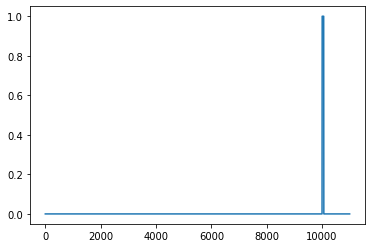

In [32]:
plt.plot(digital_array[1,1292075-10000:1292075+1000])

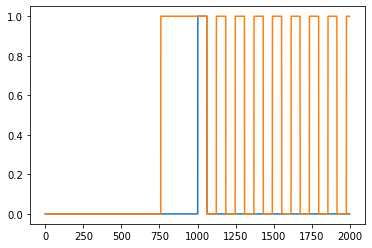

In [34]:
plt.plot(digital_array[1,1292075-1000:1292075+1000])
plt.plot(digital_array[2,1292075-1000:1292075+1000])

In [12]:
digital_array

array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [13]:
thissession

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,block block number,"trial_idx trial index, keep the original number in the file","trial_type answer of this trial, left or right","choice choice of this trial, left or right",trial_abs_start absolute start time of the trial realtive to the beginning of the session,cue_presence_left boolean vector for the presence of the towers on the left,cue_presence_right boolean vector for the presence of the towers on the right,cue_onset_left onset time of the cues on the left (only for the present ones),cue_onset_right onset time of the cues on the right (only for the present ones),cue_offset_left offset time of the cues on the left (only for the present ones),cue_offset_right offset time of the cues on the right (only for the present ones),cue_pos_left position of the cues on the left (only for the present ones),cue_pos_right position of the cues on the right (only for the present ones),trial_duration duration of the entire trial,excess_travel metric that indicates if mice travelled on a straight line,i_arm_entry the index of the time series when the mouse enters the arm part,i_blank the index of the time series when the mouse enters the blank zone,i_cue_entry the index of the time series when the mouse neters the cue zone,i_mem_entry the index of the time series when the mouse enters the memory zone,i_turn_entry the index of the time series when the mouse enters turns,iterations length of the meaningful recording,trial_id,trial_prior_p_left prior probablity of this trial for left,vi_start,"trial_time time series of this trial, start from zero for each trial",collision boolean vector indicating whether the subject hit the maze on each time point,"position 3d recording of the position of the mouse, length equals to interations","velocity 3d recording of the velocity of the mouse, length equals to interations",sensor_dots raw recordings of the ball
jjulian_jj046,2022-04-19,0,2,1,L,L,0.314472,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,20.4824,0.0554246,1116,0,722,760,1116,1209,-4,0.5,2,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,2,L,L,20.7969,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,18.9399,-0.131662,1022,0,408,458,1022,1110,1,0.5,1438,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,3,R,R,39.7367,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,17.0181,-0.0978048,829,0,450,485,829,975,2,0.5,2775,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,4,L,L,56.7549,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,16.3938,-0.130909,763,0,394,430,763,922,3,0.5,3976,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,5,R,R,73.1487,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,14.6342,-0.152547,744,0,342,372,744,789,9,0.5,5123,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,6,L,L,87.7829,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,16.5865,-0.121202,794,0,358,390,794,946,4,0.5,6140,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,7,L,L,104.369,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,24.9804,-0.107094,1435,0,1064,1095,1435,1551,1,0.5,7311,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,8,R,L,129.35,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,23.723,-0.122898,755,0,428,462,755,903,13,0.5,9089,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,9,R,R,153.073,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,18.1598,-0.0141309,913,0,522,557,913,1057,5,0.5,10814,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,2,10,R,R,171.233,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,13.6427,-0.152834,668,0,358,384,668,707,6,0.5,12099,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [9]:
digital_array.shape

(8, 28729751)

### Get samples and times where trials and iterations start

In [17]:
mode = 'counter_bit0'    #Default for sessions before 12/01/2021
#mode = 'pulses'    #Default for sessions after 12/01/2021
iteration_dict = ephys_utils.get_iteration_sample_vector_from_digital_lines_pulses(digital_array[1,:], digital_array[2,:], nidq_sampling_rate, behavior_time.shape[0], behavior_time, mode=mode)
#                             get_iteration_sample_vector_from_digital_lines_pulses(trial_pulse_signal, iteration_pulse_signal,

print(iteration_dict)

status = ephys_utils.assert_iteration_samples_count(iteration_dict['iter_start_idx'], behavior_time)
status


{'framenumber_vector_samples': array([nan, nan, nan, ..., nan, nan, nan]), 'trialnumber_vector_samples': array([nan, nan, nan, ..., nan, nan, nan]), 'iter_start_idx': array([array([183228, 183316, 183390, 183464, 183537, 183610, 183683, 183755,
              183827, 183898, 183969, 184040, 184111, 184185, 184257, 184328,
              184400, 184472, 184543, 184616, 184697, 184778, 184854, 184929,
              185001, 185075, 185147, 185219, 185291, 185363, 185436, 185520,
              185593, 185666, 185739, 185810, 185882, 185955, 186025, 186097,
              186169, 186243, 186318, 186387, 186458, 186531, 186603, 186677,
              186749, 186820, 186893, 186966, 187039, 187111, 187184, 187255,
              187327, 187399, 187471, 187544, 187615, 187688, 187759, 187831,
              187903, 187976, 188049, 188122, 188195, 188268, 188341, 188414,
              188487, 188559, 188632, 188706, 188778, 188851, 188922, 188994,
              189067, 189141, 189213, 189285, 189357,

False

In [22]:
print(iteration_dict.keys())
so = np.where(iteration_dict['trialnumber_vector_samples'] == 12)

print(so[0])


dict_keys(['framenumber_vector_samples', 'trialnumber_vector_samples', 'iter_start_idx', 'iter_times_idx'])
[1212738 1212739 1212740 ... 1292073 1292074 1292075]


### Plot signals around start of a trial

time from niDAQ 24.91208755758027
time behavior [24.926266]
samples nidaq 124562
iter nidaq (1778,)
iter_virmen (1778, 1)


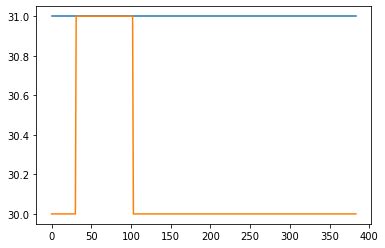

In [16]:
trial_plot = 6
samp_before = 30
end_iter = 5
samp_after = 30

plt.plot(digital_array[0,iteration_dict['iter_start_idx'][trial_plot][0]-samp_before:iteration_dict['iter_start_idx'][trial_plot][end_iter]]+samp_after)
plt.plot(digital_array[1,iteration_dict['iter_start_idx'][trial_plot][0]-samp_before:iteration_dict['iter_start_idx'][trial_plot][end_iter]]+samp_after)


iter_nidaq = (iteration_dict['iter_start_idx'][trial_plot][-1]-iteration_dict['iter_start_idx'][trial_plot][0])
time = iter_nidaq/nidq_sampling_rate
iter_virmen = time*120

print('time from niDAQ', time)
print('time behavior', behavior_time[trial_plot][-1])

print('samples nidaq', iter_nidaq)
print('iter nidaq', iteration_dict['iter_start_idx'][trial_plot].shape)
print('iter_virmen',behavior_time[trial_plot].shape)

### Plot average time differences between behavior file and nidaq time

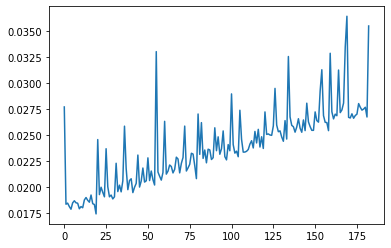

In [17]:
x = np.array([])
mean_x = np.array([])
for i in range(iteration_dict['iter_times_idx'].shape[0]-1):
    s = behavior_time[i].flatten()-iteration_dict['iter_times_idx'][i]
    mean_time_trial = np.mean(s)
    x = np.append(x,s, axis=0)
    mean_x = np.append(mean_x, mean_time_trial)

#plt.plot(x)
plt.plot(mean_x)


### Test BehaviorSync insertion

In [4]:
ephys.BehaviorSync.populate(key)

nChan: 1, nFileSamp: 18400502
1
1436
1436
2
1337
1337
3
1201
1201
4
1147
1147
5
1017
1017
6
1171
1171
7
1778
1778
8
1725
1725
9
1285
1285
10
935
935
11
1008
1008
12
904
904
13
1149
1149
14
1105
1105
15
976
976
16
1210
1210
17
1088
1088
18
1090
1090
19
1190
1190
20
1025
1025
21
1645
1645
22
1816
1816
23
1859
1859
24
1854
1854
25
1630
1630
26
1022
1022
27
1048
1048
28
997
997
29
1080
1080
30
979
979
31
1047
1047
32
1021
1021
33
1022
1022
34
1082
1082
35
1105
1105
36
1013
1013
37
1786
1786
38
3131
3131
39
985
985
40
1150
1150
41
3314
3314
42
1003
1003
43
1670
1670
44
1713
1713
45
1750
1750
46
1780
1780
47
1750
1750
48
1108
1108
49
1609
1609
50
1312
1312
51
1662
1662
52
1458
1458
53
1049
1049
54
1124
1124
55
1625
1625
56
1339
1339
57
1083
1083
58
1104
1104
59
1046
1046
60
1289
1289
61
1180
1180
62
1167
1167
63
1102
1102
64
1784
1784
65
2114
2114
66
1514
1514
67
1145
1145
68
1056
1056
69
1020
1020
70
1002
1002
71
1206
1206
72
1036
1036
73
1057
1057
74
1000
1000
75
1066
1066
76
1114
1114
77


In [5]:
ephys.BehaviorSync()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,nidq_sampling_rate sampling rate of behavioral iterations niSampRate in nidq meta file,iteration_index_nidq length of this longblob should be the number of iterations in the behavior recording,trial_index_nidq length of this longblob should be the number of iterations in the behavior recording
hnieh_E105,2021-01-15,0,5000.08,=BLOB=,=BLOB=
jjulian_jj042,2021-10-31,0,5000.06,=BLOB=,=BLOB=
jjulian_jj042,2021-11-01,0,5000.06,=BLOB=,=BLOB=
jjulian_jj046,2022-04-19,0,5000.06,=BLOB=,=BLOB=
jjulian_jj048,2022-01-14,0,5000.06,=BLOB=,=BLOB=
jjulian_jj048,2022-01-15,0,5000.06,=BLOB=,=BLOB=
jjulian_jj048,2022-01-16,0,5000.06,=BLOB=,=BLOB=
jjulian_jj048,2022-01-17,0,5000.06,=BLOB=,=BLOB=
jjulian_jj049,2022-01-14,0,5000.06,=BLOB=,=BLOB=
jjulian_jj049,2022-01-15,0,5000.06,=BLOB=,=BLOB=
